In [52]:
import pandas as pd
import geopandas as gpd
import pysal
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
hexg = gpd.read_file("../hex/hex_200.shp")

df21 = pd.read_csv("min_travel_time_hex_una_april2021.csv")
df21 = df21[["fromId","min_travel_time"]]
df21["A_21_raw"] = df21["min_travel_time"]
del df21["min_travel_time"]

df20 = pd.read_csv("min_travel_time_hex_una_febl2020.csv")
df20 = df20[["fromId","min_travel_time"]]
df20["A_20_raw"] = df20["min_travel_time"]
del df20["min_travel_time"]

df = pd.merge(df20, df21, how='outer', on="fromId")
del df20,df21

hexg = pd.merge(hexg, df, how='outer', left_on='id', right_on='fromId')
del hexg["fromId"]

hexg = hexg.fillna(64)

In [45]:
w = pysal.lib.weights.Queen.from_dataframe(hexg)
w.transform = 'r'

In [58]:
hexg['A_20_lag'] = pysal.lib.weights.lag_spatial(w, hexg['A_20_raw'])
hexg["A_20_avg"] = 0.31 * hexg["A_20_raw"] + 0.69 * hexg["A_20_lag"]

hexg['A_21_lag'] = pysal.lib.weights.lag_spatial(w, hexg['A_21_raw'])
hexg["A_21_avg"] = 0.31 * hexg["A_21_raw"] + 0.69 * hexg["A_21_lag"]

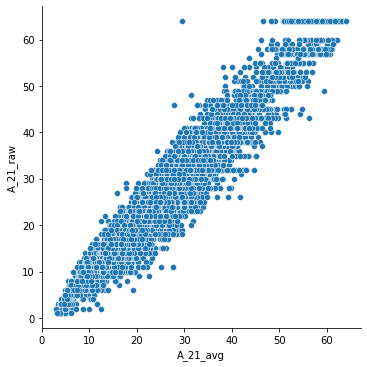

In [60]:
sns.relplot(x="A_21_avg", y="A_21_raw", data=hexg)

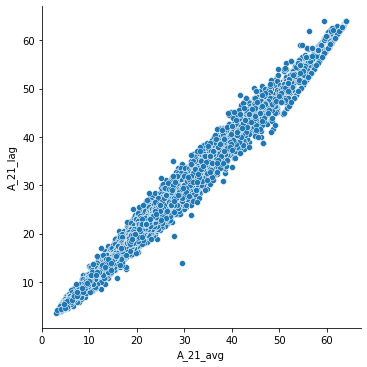

In [61]:
sns.relplot(x="A_21_avg", y="A_21_lag", data=hexg)

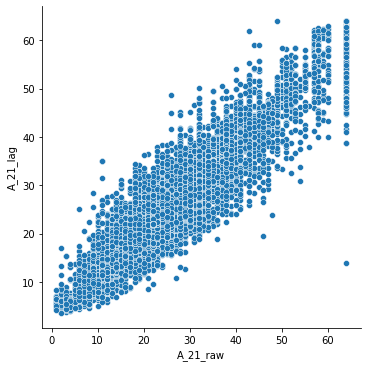

In [62]:
sns.relplot(x="A_21_raw", y="A_21_lag", data=hexg)

In [69]:
hexg.to_file("../hex/hex_200_wdata.shp")